# Demo Gromov-Wasserstein barycenter

In [28]:
import sys
sys.path.append('C:/Users/Erwan/Desktop/Stage_2A/Gromov-Wasserstein/codes/gw')
import gromov
import loss
import mapping
import time
import scipy as sp
import numpy as np
import updates
import ot
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import mpl_toolkits.axes_grid1 as axes_grid1

# Data definition

In [46]:
S=3
ns=[100,110,90]
N=100


xs=[0 for s in range(S)]

theta0 = 2*np.pi*np.random.uniform(0,1,(ns[0],1))
r01 = 8 + 2*np.random.uniform(0,1,(ns[0],1))
r02 = 6 + 2*np.random.uniform(0,1,(ns[0],1))
x00=np.multiply(np.cos(theta0),r01)
x01=np.multiply(np.sin(theta0),r02)
xs[0] =np.concatenate((x00,x01),axis=1)
xs[0]=1.6*mapping.rotation(xs[0],90)

theta1 = 2*np.pi*np.random.uniform(4,6,(ns[1],1))
r11 = 6 + 2*np.random.uniform(0,1,(ns[1],1))
r12 = 19 + 2*np.random.uniform(0,1,(ns[1],1))
x10=np.multiply(np.cos(theta1),r11)
x11=np.multiply(np.sin(theta1),r12)
xs[1] =np.concatenate((x10,x11),axis=1)
xs[1]=1.5*mapping.rotation(xs[1],60)

theta2 = 2*np.pi*np.random.uniform(2,7,(ns[2],1))
r21 = 2 + 2*np.random.uniform(0,1,(ns[2],1))
r22 = 28 + 2*np.random.uniform(0,1,(ns[2],1))
x20=np.multiply(np.cos(theta2),r21)
x21=np.multiply(np.sin(theta2),r22)
xs[2] =np.concatenate((x20,x21),axis=1)
xs[2]=1.9*mapping.rotation(xs[2],120)

Distribution generation :

In [30]:
ps=[ot.unif(ns[s]) for s in range(S)]
p=ot.unif(N)
p=p.reshape(1,len(p)).T
ps=[ps[s].reshape(1,len(ps[s])).T for s in range(S)]

Cost matrix generation :

In [31]:
Cs=[sp.spatial.distance.cdist(xs[s],xs[s]) for s in range(S)]
Cs=[cs/cs.max() for cs in Cs]

# Plot dataset

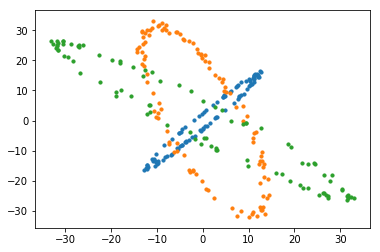

In [32]:
pl.scatter(xs[0][:,0],xs[0][:,1],s=10)
pl.scatter(xs[1][:,0],xs[1][:,1],s=10)
pl.scatter(xs[2][:,0],xs[2][:,1],s=10)
pl.show()

# Plot cost matrices

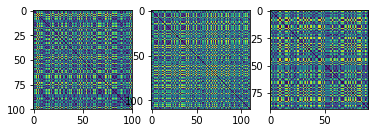

In [33]:
fig=pl.figure()

ax1=fig.add_subplot(131)
ax1.imshow(Cs[0])

ax2=fig.add_subplot(132)
ax2.imshow(Cs[1])

ax3=fig.add_subplot(133)
ax3.imshow(Cs[2])

pl.show()

# Define weigths

In [34]:
lambdas=[1/S for s in range(S)]

# Solve Gromov-Wasserstein barycenter

In [35]:
C=gromov.gromov_barycenters(N,Cs,ps,p,lambdas,loss.tensor_square_loss,updates.update_square_loss,5e-4,numItermax=1000,stopThr=1e-3)

# Barycenter cost matrix plot

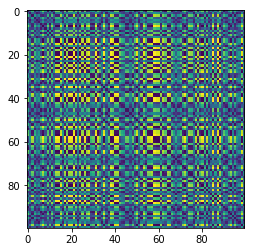

In [36]:
pl.imshow(C)
pl.show()

# Interpolated data by mds

In [47]:
npos=[0,0,0]
npos=[mapping.smacof_mds(Cs[s],2) for s in range(S)]

nposbary=mapping.smacof_mds(C,2)

clf = PCA(n_components=2)

npos=[clf.fit_transform(npos[s]) for s in range(S)]
nposbary=clf.fit_transform(nposbary)

# Plotting interpolated data

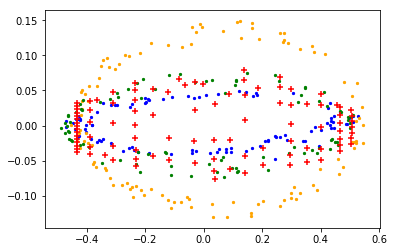

In [49]:
pl.scatter(npos[0][:,0],npos[0][:,1],color='b',s=5)
pl.scatter(npos[1][:,0],npos[1][:,1],color='orange',s=5)
pl.scatter(npos[2][:,0],npos[2][:,1],color='g',s=5)
pl.scatter(nposbary[:,0],nposbary[:,1],color='r',marker='+')
pl.show()

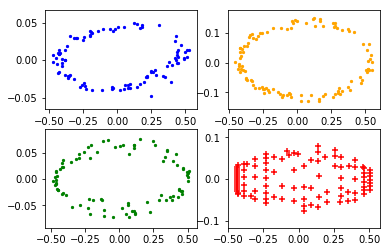

In [48]:
fig=pl.figure()

ax1=fig.add_subplot(221)
ax1.scatter(npos[0][:,0],npos[0][:,1],color='b',s=5)

ax2=fig.add_subplot(222)
ax2.scatter(npos[1][:,0],npos[1][:,1],color='orange',s=5)

ax3=fig.add_subplot(223)
ax3.scatter(npos[2][:,0],npos[2][:,1],color='g',s=5)

ax4=fig.add_subplot(224)
ax4.scatter(nposbary[:,0],nposbary[:,1],color='r',marker='+')

pl.show()